# 📊 Projet : Explorer et comprendre les performances des employés (Python)

---

## Introduction

Une entreprise souhaite analyser la répartition des performances des employés afin de comprendre les écarts et identifier les **outliers**.  
L'objectif est d'étudier les distributions des **scores de performance** et des **heures travaillées** pour détecter les facteurs d'amélioration RH.

**Dataset utilisé** : [HR Analytics Dataset (Kaggle)](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)
    

## 1. Importation des Librairies

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.  Importation des données

In [104]:
data = pd.read_csv('HRDataset_v14.csv')

In [105]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## 3. Nettoyage des données

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [107]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [108]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [109]:
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [110]:
data.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

## 4.  Analyse exploratoire globale

#### Analyser la distribution des scores de performance

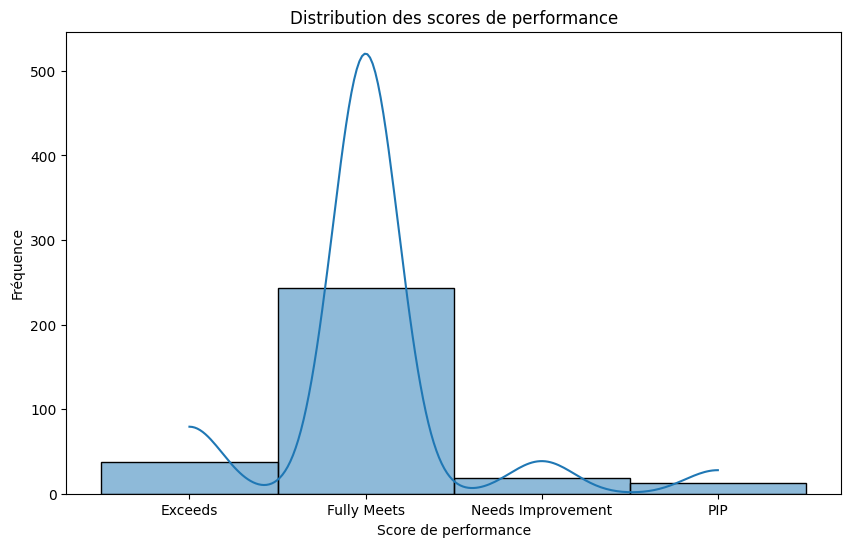

In [111]:
## Analyser la distribution des scores de performance 

plt.figure(figsize=(10, 6))
sns.histplot(data['PerformanceScore'], bins=5, kde=True)
plt.title('Distribution des scores de performance')
plt.xlabel('Score de performance')
plt.ylabel('Fréquence')
plt.show()

Ce graphique combine un histogramme (barres bleues) et une courbe de densité (ligne bleue) pour montrer la répartition des employés selon leurs catégories de performance.
La concentration massive dans "Fully Meets" indique que la plupart des employés répondent aux attentes en atteignant leurs objectifs

In [112]:
# ressortir les employés avec les scores de performance "Exceeds" 
data[data['PerformanceScore'] == 'Exceeds']


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
12,"Barbossa, Hector",10012,0,2,1,1,3,4,1,92328,...,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9
16,"Beak, Kimberly",10023,1,1,0,2,5,4,0,70131,...,Kelley Spirea,18.0,Employee Referral,Exceeds,4.40,3,0,1/14/2019,0,16
22,"Billis, Helen",10003,1,1,0,1,5,4,0,62910,...,Brannon Miller,12.0,Indeed,Exceeds,5.00,3,0,2/27/2019,0,19
36,"Candie, Calvin",10001,0,0,1,1,5,4,0,72640,...,Janet King,2.0,Indeed,Exceeds,5.00,3,0,2/22/2019,0,14
51,"Clukey, Elijian",10029,1,1,1,2,5,4,0,50373,...,Brannon Miller,12.0,Employee Referral,Exceeds,4.10,4,0,2/28/2019,0,5
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15
76,"Dougall, Eric",10028,0,0,1,1,3,4,0,138888,...,Jennifer Zamora,5.0,Indeed,Exceeds,4.30,5,5,1/4/2019,0,4
77,"Driver, Elle",10006,0,0,0,1,6,4,0,74241,...,Lynn Daneault,21.0,Indeed,Exceeds,4.77,5,0,1/27/2019,0,14


#### Analyse de la distribution des salaires

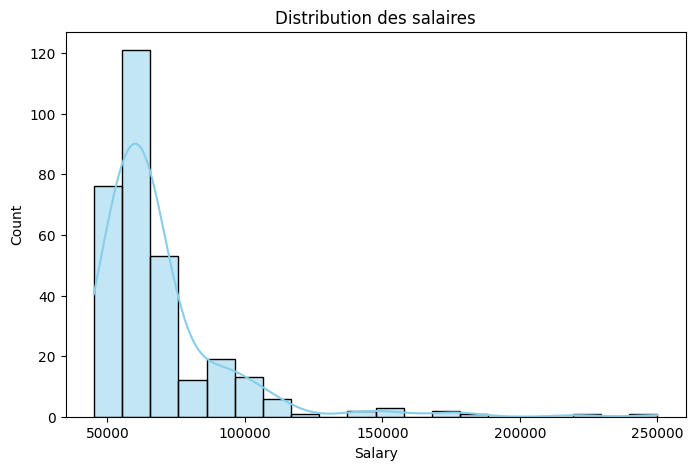

In [128]:

plt.figure(figsize=(8, 5))
sns.histplot(data["Salary"], bins=20, kde=True, color="skyblue")
plt.title("Distribution des salaires")
plt.show()


#### Heatmap des correlations

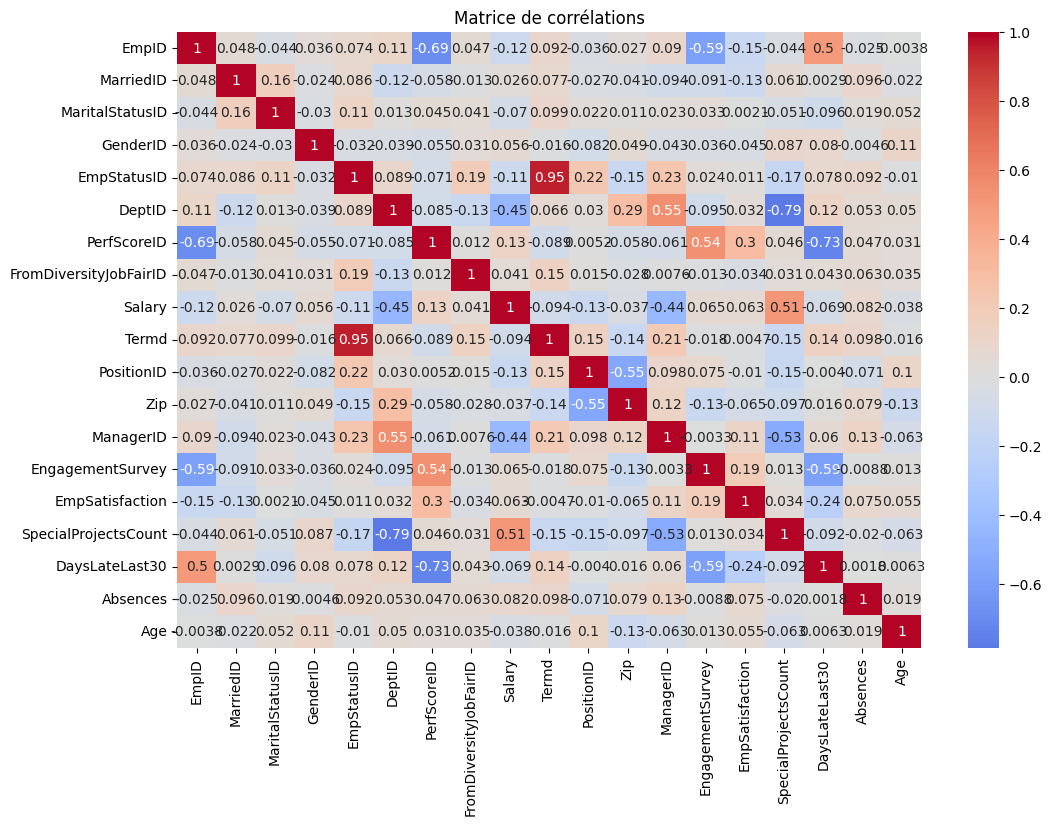

In [129]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélations")
plt.show()

## 5. Analyse des performances et des variables individuelles

#### Analyse de l'impact de l'âge sur la performance

In [113]:
# Conversion en datetime pour la colonne DOB
data["DOB"] = pd.to_datetime(data["DOB"], format='mixed', errors='coerce')

# Date d’aujourd’hui
today = pd.Timestamp.today()

# Calcul de l’âge
data["Age"] = (today - data["DOB"]).dt.days // 365
data['Age'] = data['Age'].abs()
data


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,42
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,50
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,37
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,37
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,40
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4,43
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,46
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,46


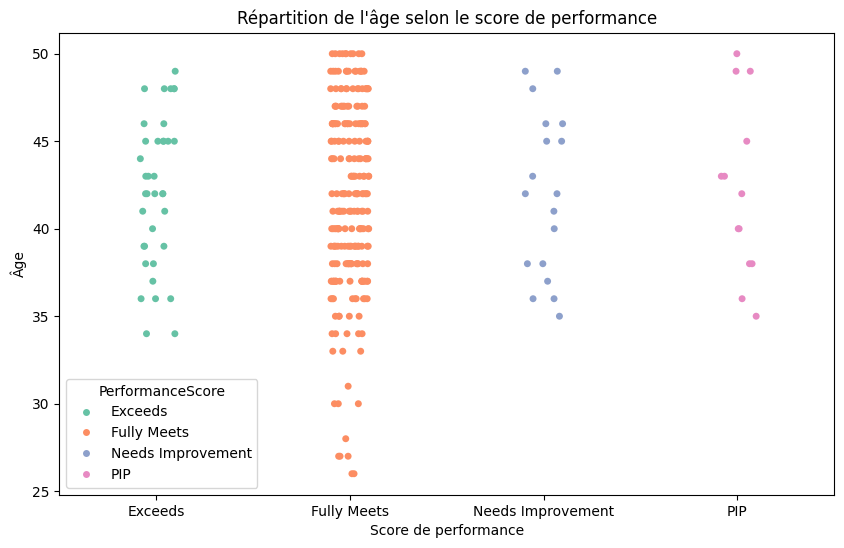

In [115]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='PerformanceScore', y='Age', data=data, jitter=True,hue='PerformanceScore', palette="Set2", legend=True)
plt.title("Répartition de l'âge selon le score de performance")
plt.xlabel('Score de performance')
plt.ylabel('Âge')
plt.show()

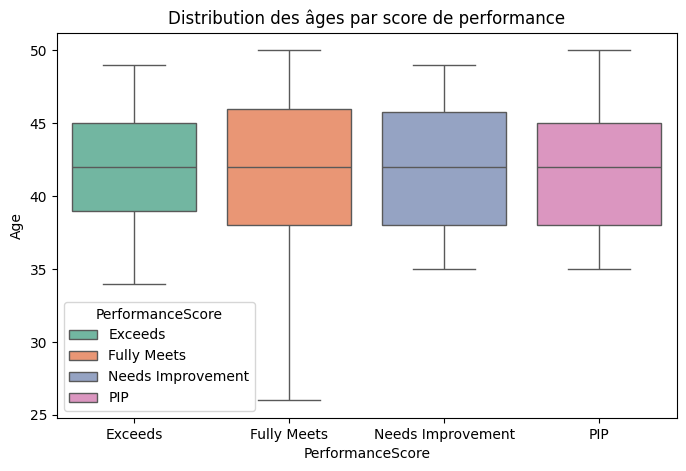

In [116]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PerformanceScore', y='Age', data=data, hue='PerformanceScore', palette="Set2", legend=True)
plt.title('Distribution des âges par score de performance')
plt.show()

Ce graphique montre qu'on trouve les employés performants et moins performants dans toutes les catégories d'âge donc l'âge n'influence pas la performance. On pourrait également constater que les jeunes de moins 32 ans se contentent d'atteindre leurs objectifs.

Les graphiques suggèrent qu'il n'y a pas de correlation forte entre l'âge et les performances. Les médianes sont similaires dans toutes les catégories (autour de 42ans et 45ans). Cependant, on peut noter que la catégorie Fully Meets présente la plus grande variabilité d'âges, incluant les employés les plus jeunes, ce qui pourrait indiquer que les nouveaux employés tendent à avoir des performances satisfaisantes.

## 6. Analyse de la Performance par département

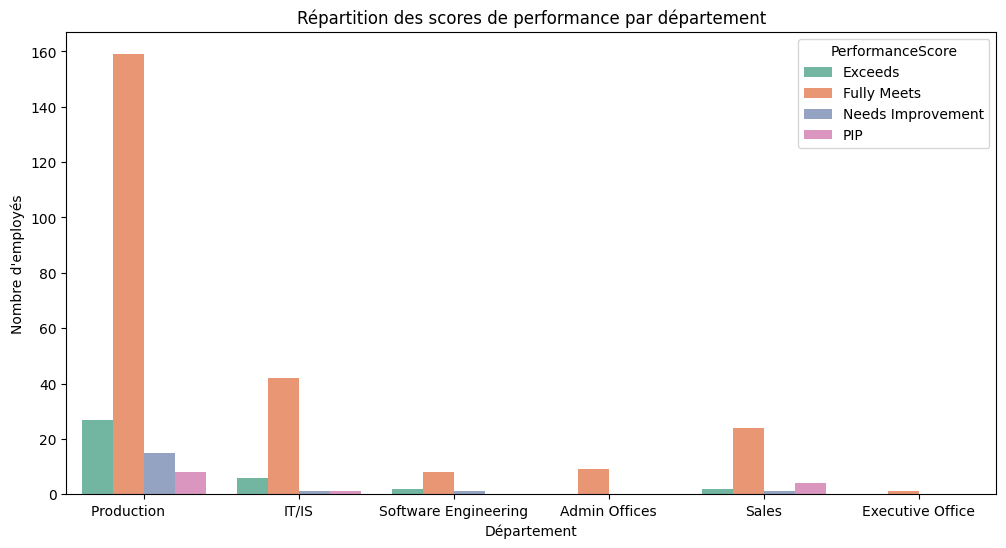

In [117]:
# performances par departement
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='PerformanceScore', data=data, palette="Set2")
plt.title('Répartition des scores de performance par département')
plt.xlabel('Département')
plt.ylabel('Nombre d\'employés')
plt.show()


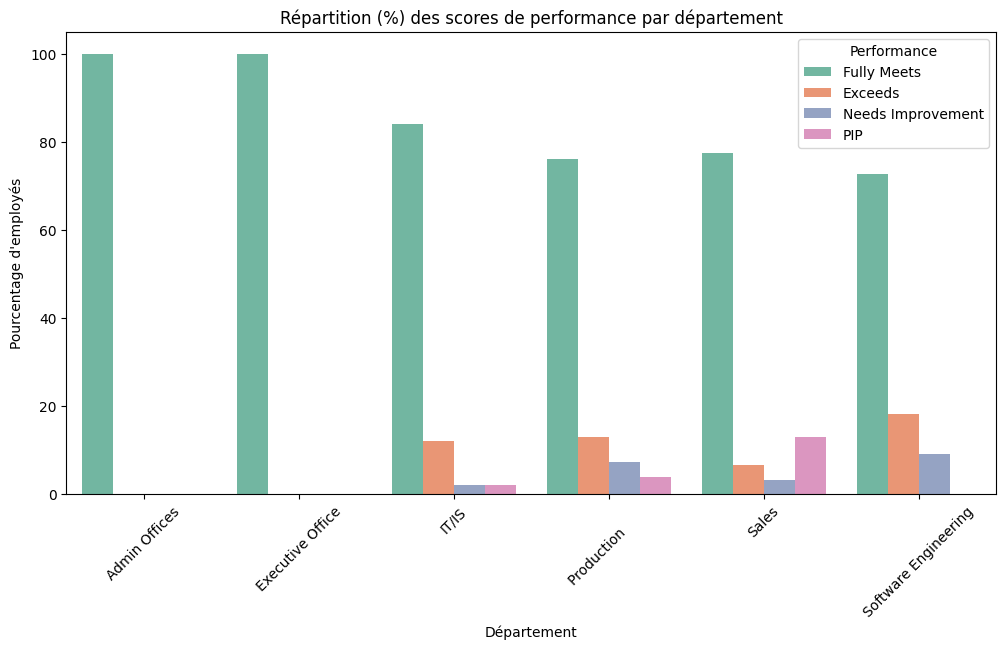

In [173]:
# Calculer les pourcentages par département
df_percent = (
    data.groupby(['Department', 'PerformanceScore'])
    .size()
    .reset_index(name='count')
)
# # Normaliser par département pour obtenir des pourcentages
df_percent['percentage'] = df_percent.groupby('Department')['count'].transform(lambda x: 100 * x / x.sum())
# # Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Department',
    y='percentage',
    hue='PerformanceScore',
    data=df_percent,
    palette="Set2"
)

plt.title('Répartition (%) des scores de performance par département')
plt.xlabel('Département')
plt.ylabel('Pourcentage d\'employés')
plt.xticks(rotation=45)
plt.legend(title="Performance")
plt.show()


. On peut constater que le département IT/IS présente le profil de performance le plus stable avec plus de 80% des employés qui atteignent leurs objectifs et plus de 10% qui dépassent leurs objectifs.
. 100% des objectifs sont dépassés dans les départements Admin et Executive par les employés
. le département Sales montre la plus forte variabilité relative avec des pics de performance et de difficultés
. le département de Production suit une distribution normale attendue pour un large effectif
 

## 7. Analyse de la Performance et l'engagement des employés

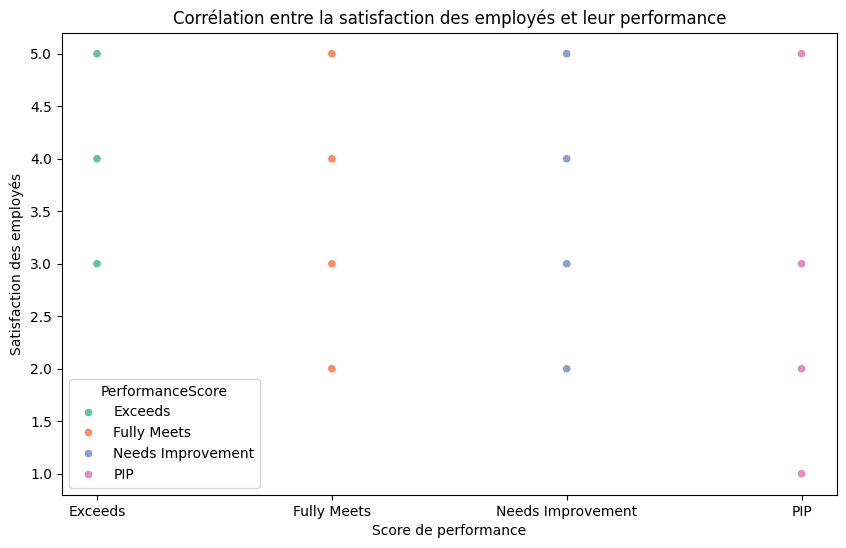

In [122]:
# identifier la correlation entre la satisfaction des employés et leur performance
plt.figure(figsize=(10, 6))
sns.scatterplot(y='EmpSatisfaction', x='PerformanceScore', data=data, hue='PerformanceScore', palette="Set2")
plt.title('Corrélation entre la satisfaction des employés et leur performance')
plt.xlabel('Score de performance')
plt.ylabel('Satisfaction des employés')
plt.show()

Le graphique démontre que les personnes ayant les pires scores de satisfaction sont ceux qui ont des profils PIP (plan d'améliorations de performance) à qui on a établit des objectifs spécifiques pour coriger des problème de performance.

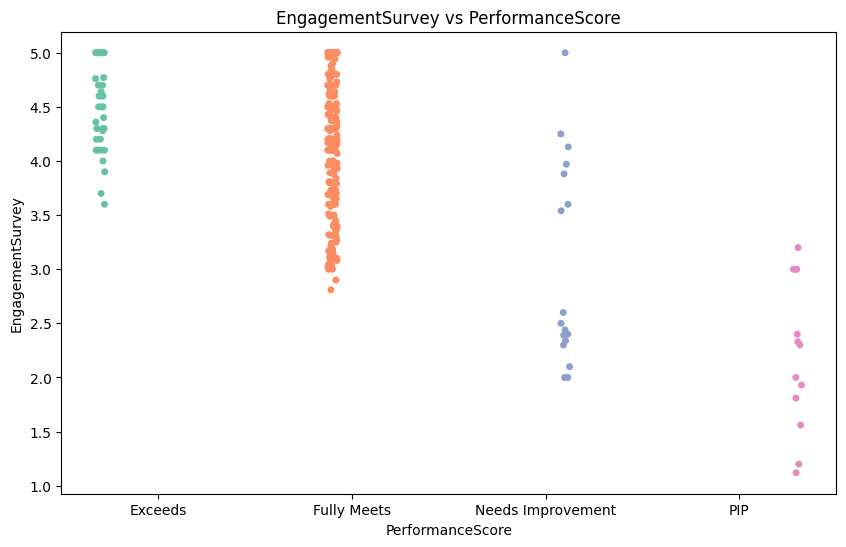

In [64]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='PerformanceScore', y='EngagementSurvey', data=data, jitter=True, hue='PerformanceScore', palette="Set2", dodge=True)
plt.title('EngagementSurvey vs PerformanceScore')
plt.xlabel('PerformanceScore')
plt.ylabel('EngagementSurvey')
plt.show()

Le graphique démontre que les personnes ayant les pires scores d'engagement (en dessous de 2.5) sont ceux qui ont des profils PIP et ceux qui doivent s'améliorer.

## 8. Performances et comportements des employés

#### Analyse des absences vs PerformanceScore

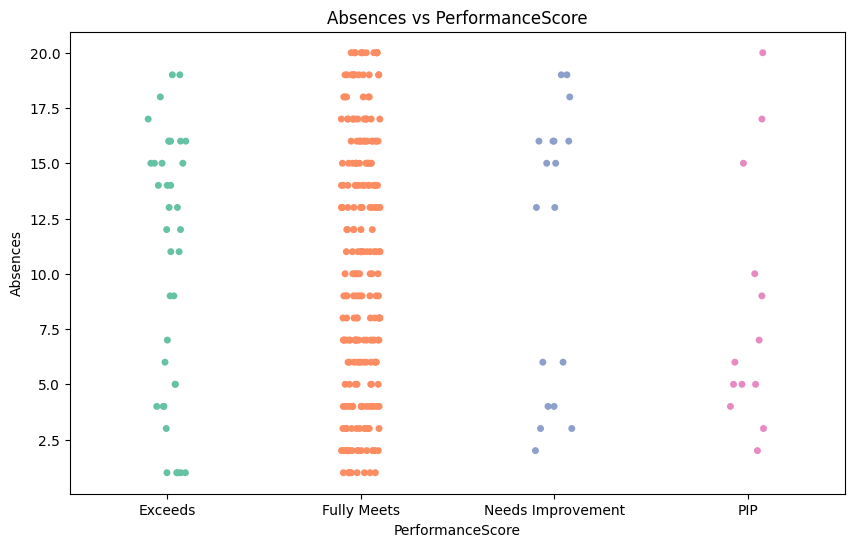

In [124]:
# vérifier si un fort absentéisme est lié à une faible performance
plt.figure(figsize=(10, 6))
sns.stripplot(y='Absences', x='PerformanceScore', data=data, hue='PerformanceScore', palette="Set2")
plt.title('Absences vs PerformanceScore')
plt.xlabel('PerformanceScore')
plt.ylabel('Absences')
plt.show()

Sur ce graphique nous pouvons constater que ceux qui ont besoin d'amélioration ne sont pas forcément absents ce qui pourrait pousser à approfondir l'analyse pour comprendre leurs besoins. (comprendre ceux qui ont besoin d'améliotion et qui ne sont pas forcément absents)

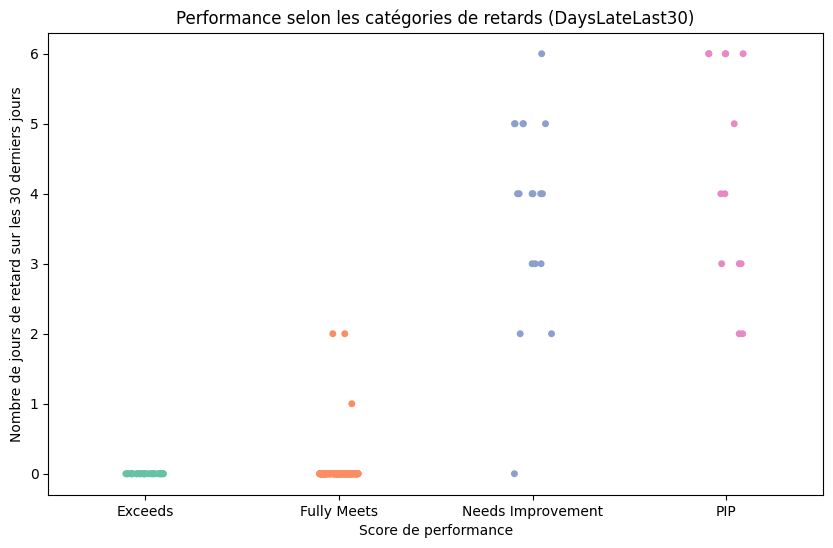

In [125]:
plt.figure(figsize=(10, 6))
sns.stripplot(y='DaysLateLast30', x='PerformanceScore', data=data, hue='PerformanceScore', palette="Set2")
plt.title('Performance selon les catégories de retards (DaysLateLast30)')
plt.xlabel('Score de performance')
plt.ylabel('Nombre de jours de retard sur les 30 derniers jours')
plt.show()


Ceux qui dépassent leur objectifs ne sont pratiquement jamais absents

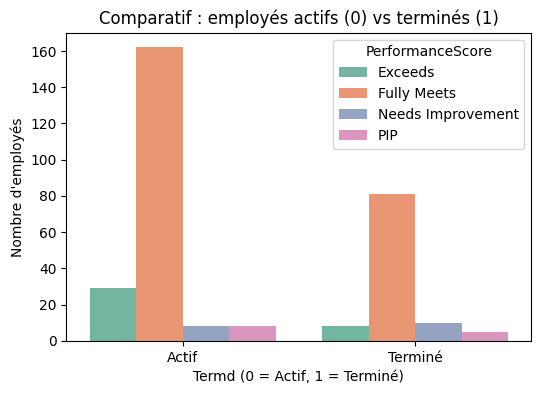

In [126]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Termd', data=data, palette='Set2', hue='PerformanceScore')
plt.title('Comparatif : employés actifs (0) vs terminés (1)')
plt.xlabel('Termd (0 = Actif, 1 = Terminé)')
plt.ylabel('Nombre d\'employés')
plt.xticks([0, 1], ['Actif', 'Terminé'])
plt.show()


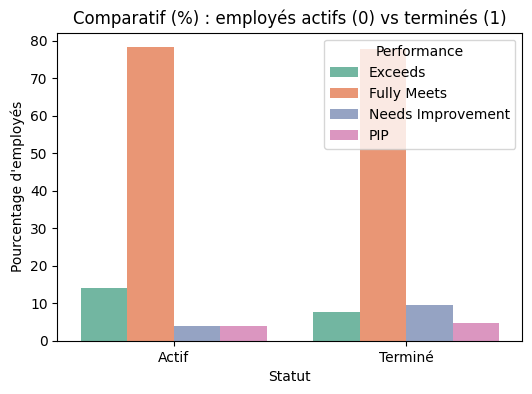

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les effectifs
df_percent = (
    data.groupby(['Termd', 'PerformanceScore'])
    .size()
    .reset_index(name='count')
)

# Normaliser par statut (0 = actif, 1 = terminé)
df_percent['percentage'] = df_percent.groupby('Termd')['count'].transform(lambda x: 100 * x / x.sum())

# Visualisation
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Termd',
    y='percentage',
    hue='PerformanceScore',
    data=df_percent,
    palette='Set2'
)

plt.title('Comparatif (%) : employés actifs (0) vs terminés (1)')
plt.xlabel('Statut')
plt.ylabel('Pourcentage d\'employés')
plt.xticks([0, 1], ['Actif', 'Terminé'])
plt.legend(title="Performance")
plt.show()


## 9. Performances et ancienneté 

#### Analyser les performances et l'ancienneté

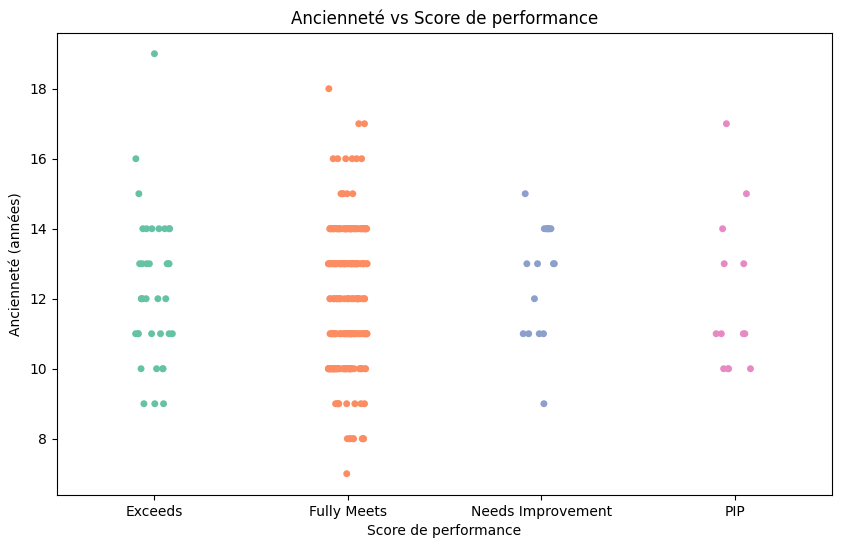

In [102]:
# Calculer l'ancienneté en années pour chaque employé
data['DateofHire'] = pd.to_datetime(data['DateofHire'], errors='coerce')
data['Anciennete'] = (today - data['DateofHire']).dt.days // 365

plt.figure(figsize=(10, 6))
sns.stripplot(x='PerformanceScore', y='Anciennete', data=data, hue='PerformanceScore', palette="Set2")
plt.title('Ancienneté vs Score de performance')
plt.xlabel('Score de performance')
plt.ylabel('Ancienneté (années)')
plt.show()

Le score de performance ne dépend pas forcément de l'ancienneté car dans toutes les catégories on observe un e grande variabilité. Par contre on observe quelques employés avec moins de 8 ans d'expériences qui se contentent uniquement d'atteindre leurs objectifs et rien de plus.

## 10. Analyse des salaires et des heures travaillées

#### Analyse des salaires par score de performance

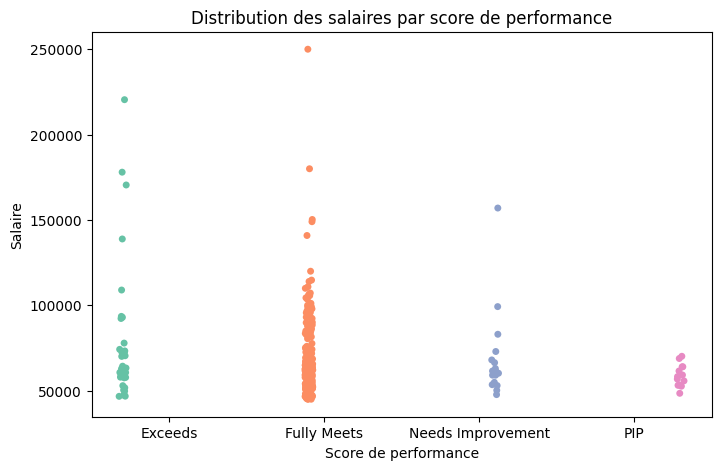

In [140]:
plt.figure(figsize=(8,5))
sns.stripplot(x='PerformanceScore', y='Salary', data=data, palette="Set2", hue='PerformanceScore', dodge=True)
plt.title('Distribution des salaires par score de performance')
plt.xlabel('Score de performance')
plt.ylabel('Salaire')
plt.show()


Le graphique montre une corrélation positive entre le score de performance et le salaire, ce qui est attendu : plus le score de performance est élevé, plus le salaire l'est généralement. Cependant, la dispersion des salaires dans les catégories de haute performance ("Exceeds" et "Fully Meets") est très forte. Cela suggère que d'autres facteurs jouent un rôle important dans la détermination du salaire, en plus du seul score de performance.

#### Analyse des salaires par département

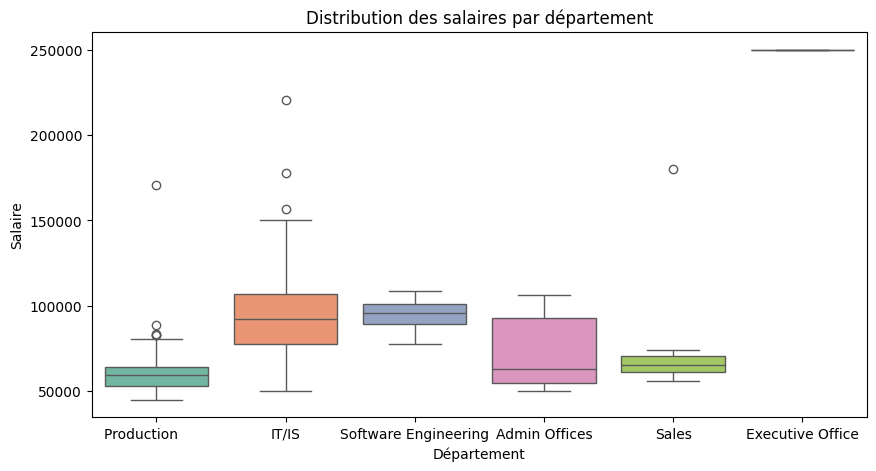

In [142]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Department', y='Salary', data=data, palette="Set2", hue='Department')
plt.title('Distribution des salaires par département')
plt.xlabel('Département')
plt.ylabel('Salaire')
plt.show()


Cette distribution reflète une hiérarchie salariale classique où les métiers techniques et de direction sont mieux rémunérés que les fonctions support et opérationnelles. En outre sur cette distribution des salaires par département le graphique met en évidence des disparités claires entre les domaines d'activité. Les départements Software Engineering et Executive Office se distinguent avec les salaires médians les plus élevés, ce qui reflète la valeur stratégique et le niveau de responsabilité de ces fonctions. À l'inverse, des départements comme Production et Admin Offices ont des salaires médians plus bas et des distributions de salaires moins étendues. 

In [156]:
# Calculer l'ancienneté en années pour chaque employé
data['DateofHire'] = pd.to_datetime(data['DateofHire'], errors='coerce')
data['Anciennete'] = (today - data['DateofHire']).dt.days // 365


# Filtrer les employés selon les critères choisis
filtre = (
    (data["Salary"] >= 100000) &
    (data["Termd"] == 0) &  
    #(data["Anciennete"] <= 12) &  
    (data["EmpSatisfaction"] >= 3) &
    (data["EngagementSurvey"] >= 3) #&
    #(data["Absences"] > 5)
)

# Sélection des colonnes pertinentes
colonnes = [
    "Employee_Name", "Department", "Sex", "Position", "PerformanceScore",
    "Salary", "Anciennete", "EmpSatisfaction", "EngagementSurvey", "Absences"
]

employes_selectionnes = data.loc[filtre, colonnes]
employes_selectionnes


,Employee_Name,Department,Sex,Position,PerformanceScore,Salary,Anciennete,EmpSatisfaction,EngagementSurvey,Absences
26,"Boutwell, Bonalyn",Admin Offices,F,Sr. Accountant,Fully Meets,106367,10,4,5.00,4
39,"Carr, Claudia N",IT/IS,F,Sr. DBA,Fully Meets,100031,9,5,5.00,7
42,"Champaigne, Brian",IT/IS,M,BI Director,Fully Meets,110929,9,5,4.50,8
55,"Corleone, Vito",Production,M,Director of Operations,Exceeds,170500,16,5,3.70,15
66,"Del Bosque, Keyla",Software Engineering,F,Software Engineer,Fully Meets,101199,13,5,3.79,8
76,"Dougall, Eric",IT/IS,M,IT Manager - Support,Exceeds,138888,11,5,4.30,4
96,"Foss, Jason",IT/IS,M,IT Director,Exceeds,178000,14,5,5.00,15
131,"Houlihan, Debra",Sales,F,Director of Sales,Fully Meets,180000,11,4,4.50,19
144,"Johnson, Noelle",IT/IS,F,Database Administrator,Fully Meets,105700,10,3,3.75,2
150,"King, Janet",Executive Office,F,President & CEO,Fully Meets,250000,13,3,4.83,10


#### Salaire vs Ancienneté

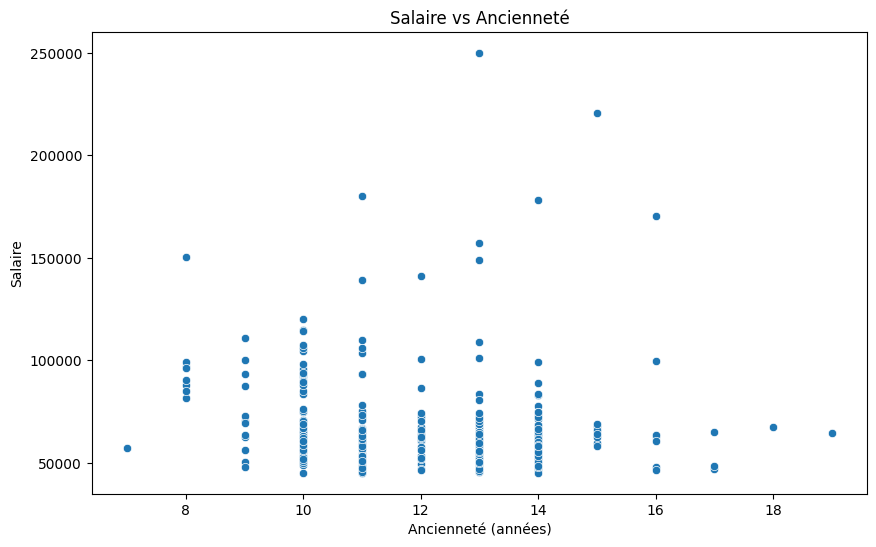

In [180]:
#salaires en fonction de l'ancienneté
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anciennete', y='Salary', data=data)
plt.title('Salaire vs Ancienneté')
plt.xlabel('Ancienneté (années)')
plt.ylabel('Salaire')
plt.show()


Le graphique confirme qu'en général, plus un employé reste longtemps dans l'entreprise, plus son salaire est susceptible d'augmenter. Cependant, l'ancienneté ne suffit pas pour prédire le salaire car il y'a une grande variabilité au niveau des salaires. 

## 11. Détection et Analyse des outliers

In [170]:
# Fonction pour détecter les outliers avec la règle 1.5 * IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Détecter les outliers dans la colonne 'performanceScore'
outliers, lower_bound, upper_bound = detect_outliers_iqr(data, 'PerfScoreID')
print(f"Bornes de détection : {lower_bound:.2f} - {upper_bound:.2f}")
print(f"Nombre d'outliers détectés : {len(outliers)}")

Bornes de détection : 3.00 - 3.00
Nombre d'outliers détectés : 68


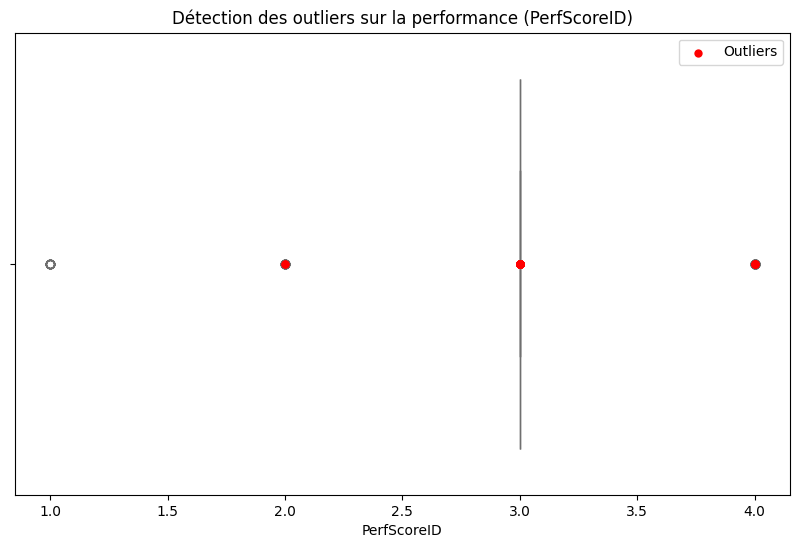

In [171]:
# Visualiser avec un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["PerfScoreID"], color="skyblue")
sns.stripplot(x=outliers_Salary["PerfScoreID"], color="red", size=6, jitter=False, label="Outliers")
plt.title("Détection des outliers sur la performance (PerfScoreID)")
plt.legend()
plt.show()

In [ ]:
# Exemple : détecter les outliers sur les salaires
outliers_Salary, low, high = detect_outliers_iqr(data, "Salary")

print(f"Bornes de détection : {low:.2f} - {high:.2f}")
print(f"Nombre d'outliers détectés : {len(outliers_Salary)}")

# Afficher les employés outliers avec colonnes clés
outliers_Salary[["Employee_Name", "Department", "PerformanceScore", "Salary", "EmpSatisfaction", "Absences"]].head()


Bornes de détection : 30699.75 - 96837.75
Nombre d'outliers détectés : 29


,Employee_Name,Department,PerformanceScore,Salary,EmpSatisfaction,Absences
1,"Ait Sidi, Karthikeyan",IT/IS,Fully Meets,104437,3,17
18,"Becker, Renee",IT/IS,Fully Meets,110000,4,8
25,"Booth, Frank",IT/IS,Fully Meets,103613,5,2
26,"Boutwell, Bonalyn",Admin Offices,Fully Meets,106367,4,4
39,"Carr, Claudia N",IT/IS,Fully Meets,100031,5,7


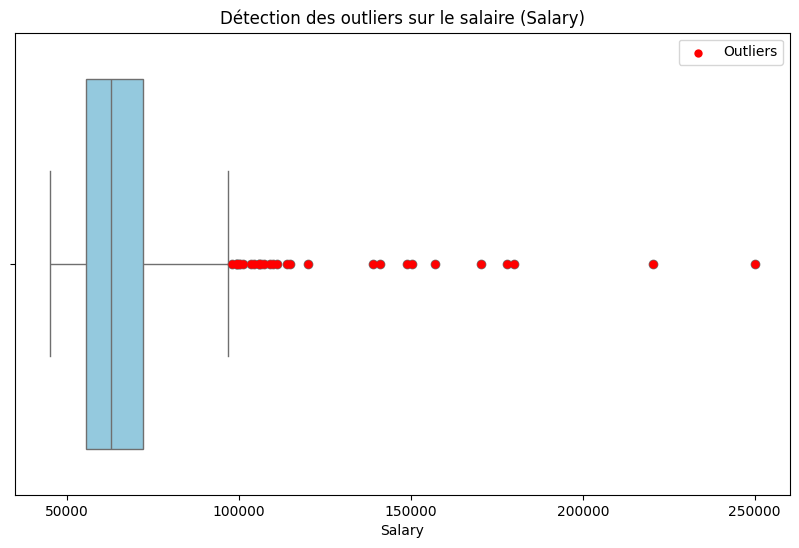

In [161]:

# Visualiser avec un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Salary"], color="skyblue")
sns.stripplot(x=outliers_Salary["Salary"], color="red", size=6, jitter=False, label="Outliers")
plt.title("Détection des outliers sur le salaire (Salary)")
plt.legend()
plt.show()

Bornes de détection : -10.00 - 30.00
Nombre d'outliers détectés : 0


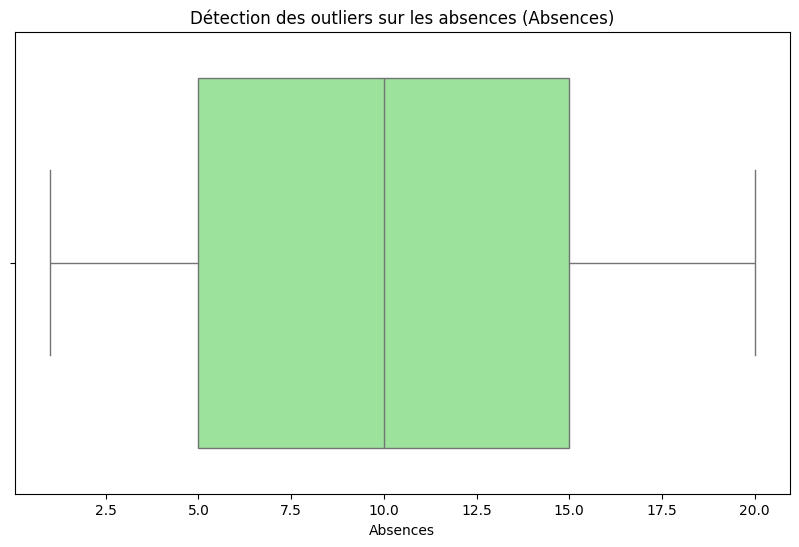

In [172]:
# Détecter les outliers sur les absences
outliers_Absences, low_a, high_a = detect_outliers_iqr(data, "Absences")   
print(f"Bornes de détection : {low_a:.2f} - {high_a:.2f}")
print(f"Nombre d'outliers détectés : {len(outliers_Absences)}")

# Visualiser avec un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Absences"], color="lightgreen")
sns.stripplot(x=outliers_Absences["Absences"], color="red", size=6, jitter=False, label="Outliers")
plt.title("Détection des outliers sur les absences (Absences)")
plt.show()


L'analyse de ces graphiques montre que l'entreprise rémunère ses employés en combinant la performance individuelle et la valeur du poste. Les salaires les plus élevés sont réservés aux départements jugés stratégiques, comme le Software Engineering, et aux individus les plus performants. Cependant, l'équité des évaluations de performance est incertaine, car certains départements n'ont aucune sous-performance déclarée, alors que d'autres affichent des écarts importants. Enfin, si l'ancienneté favorise la progression salariale, elle n'est pas le seul facteur : les promotions et les changements de rôle semblent être les véritables leviers d'augmentation à long terme.

## L'analyse des données RH : comprendre les dynamiques humaines
____
Ce notebook a pour objectif d'explorer les facteurs clés qui influencent la performance, la satisfaction et la rémunération des employés au sein de notre entreprise. À travers une série de visualisations de données, nous avons mis en avant ce qui motive et influence nos employés.
___
### Ce que nous avons découvert
Notre analyse a révélé un système de rémunération à double facette. D'une part, les salaires sont fortement alignés sur la valeur stratégique des départements, avec des fonctions clés comme Software Engineering bénéficiant de rémunérations plus élevées. D'autre part, la performance individuelle agit comme un puissant levier : les employés qui dépassent les attentes accèdent à des salaires et à des avantages significativement supérieurs, tout en affichant un engagement et un bien-être nettement plus élevés.

Cependant, nous avons identifié un point d'attention majeur : l'équité des évaluations de performance. Les données montrent une grande incohérence entre les départements, ce qui pourrait signaler un manque d'uniformité dans nos critères de notation. Si certains départements affichent une perfection trompeuse, d'autres révèlent des écarts de performance importants, ce qui souligne la nécessité de standardiser nos processus pour garantir une gestion plus juste et transparente.

Enfin, notre étude a montré que l'ancienneté ne suffit pas pour garantir une progression de carrière. Bien qu'elle soit corrélée à une hausse des salaires, elle n'est pas le moteur principal de la croissance salariale à long terme. Les augmentations les plus significatives sont le fruit de la performance, de la prise de responsabilités et de l'évolution des rôles.
___

### Prochaines étapes
Les informations contenues dans ce notebook ne sont pas de simples statistiques ; elles sont une invitation à l'action. En tant que décideurs, nous devons nous interroger sur la manière dont nous pouvons transformer ces observations en décisions stratégiques.

**Standardiser les évaluations** : Comment pouvons-nous harmoniser les critères de performance pour garantir que chaque employé est évalué de manière juste, quel que soit son département ?

**Investir dans le développement** : Comment pouvons-nous aider les employés à passer de la catégorie "Needs Improvement" à "Fully Meets" en leur fournissant les outils et le soutien nécessaires ?

**Reconnaître et fidéliser** : Comment pouvons-nous mieux récompenser les talents les plus performants pour assurer leur fidélité à long terme ?

En s'appuyant sur ces données, nous pouvons non seulement améliorer la satisfaction de nos employés, mais aussi renforcer la performance globale de notre organisation.